<a href="https://colab.research.google.com/github/FFazzano/Analise-Titanic/blob/main/analise_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic.dropna(subset=['embarked'], inplace=True)


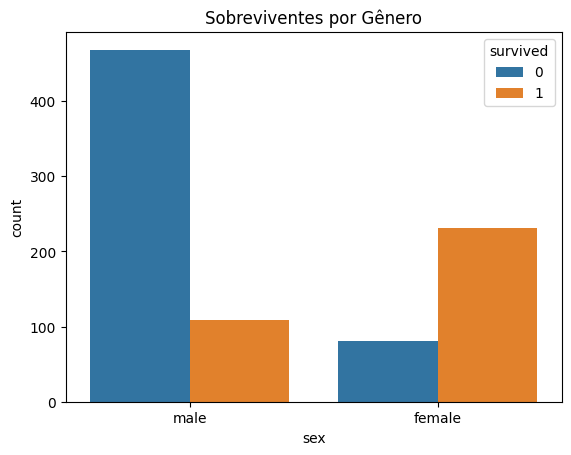

In [5]:
sns.countplot(data=titanic, x='sex', hue='survived')
plt.title('Sobreviventes por Gênero')
plt.show()


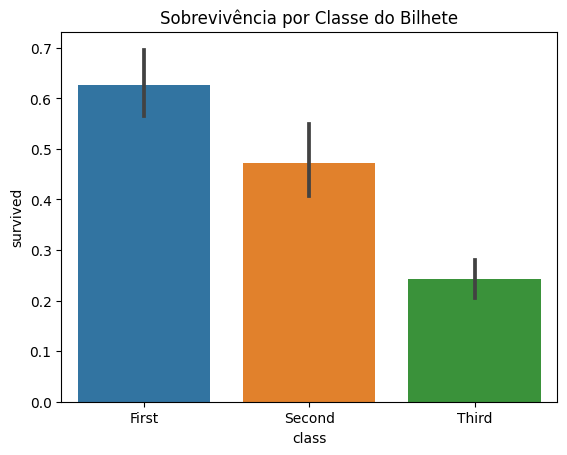

In [6]:
sns.barplot(data=titanic, x='class', y='survived')
plt.title('Sobrevivência por Classe do Bilhete')
plt.show()


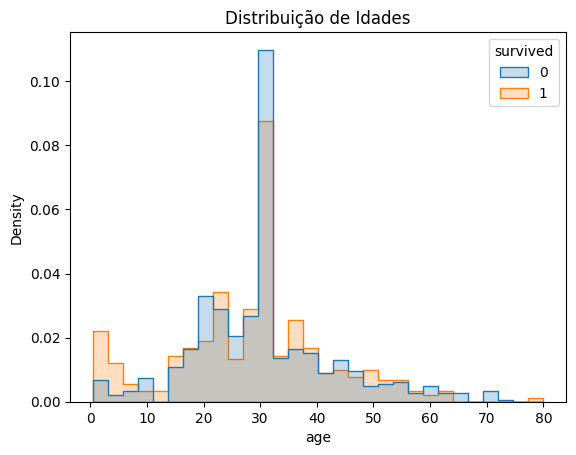

In [7]:
sns.histplot(data=titanic, x='age', hue='survived', element="step", stat="density", common_norm=False)
plt.title('Distribuição de Idades')
plt.show()


<ipython-input-8-41b32e87ee7e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic.corr()


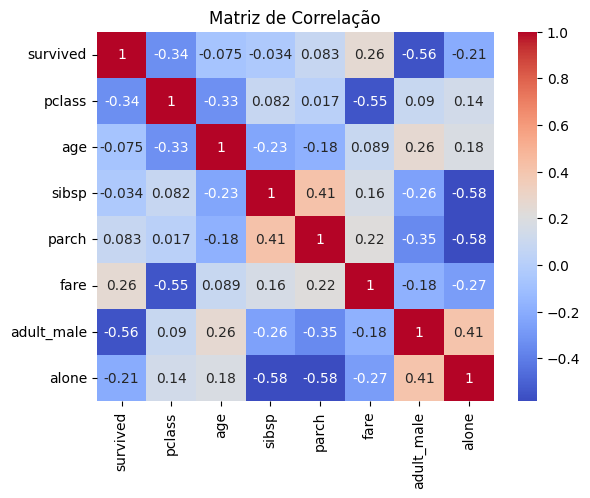

In [8]:
correlation_matrix = titanic.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


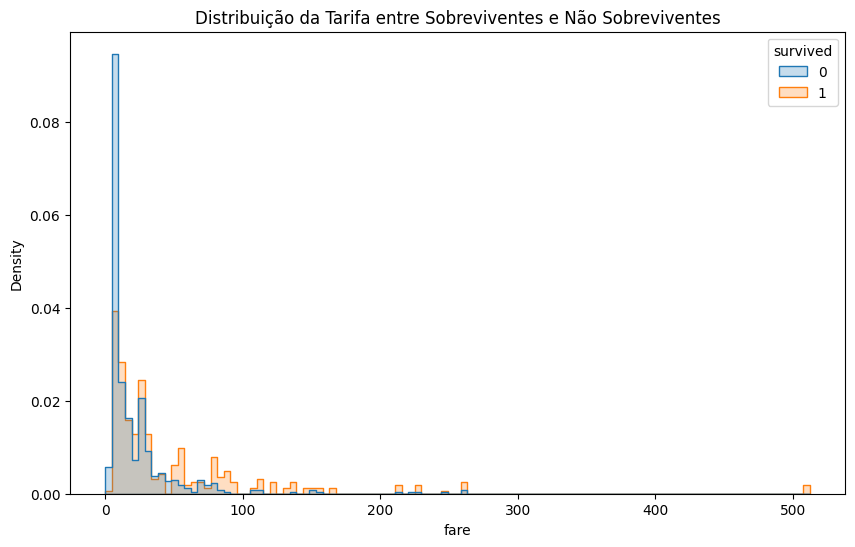

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data=titanic, x='fare', hue='survived', element="step", stat="density", common_norm=False)
plt.title('Distribuição da Tarifa entre Sobreviventes e Não Sobreviventes')
plt.show()


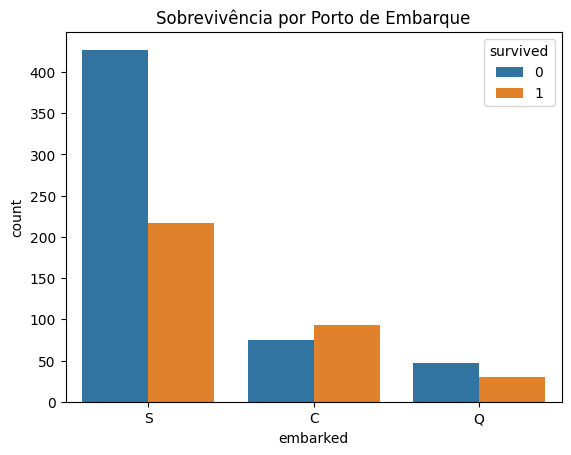

In [10]:
sns.countplot(data=titanic, x='embarked', hue='survived')
plt.title('Sobrevivência por Porto de Embarque')
plt.show()


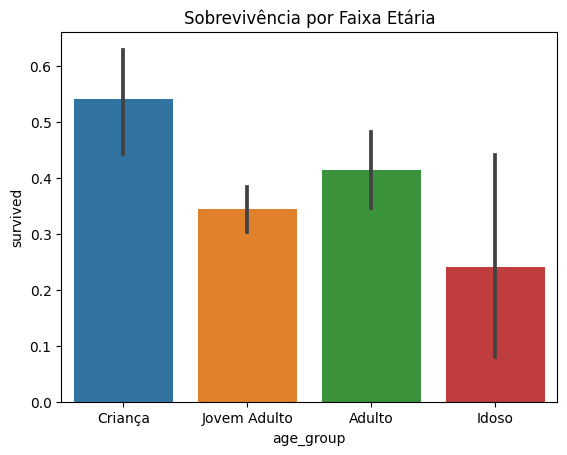

In [11]:
bins = [0, 18, 35, 60, 100]
labels = ['Criança', 'Jovem Adulto', 'Adulto', 'Idoso']
titanic['age_group'] = pd.cut(titanic['age'], bins=bins, labels=labels, right=False)

sns.barplot(data=titanic, x='age_group', y='survived')
plt.title('Sobrevivência por Faixa Etária')
plt.show()


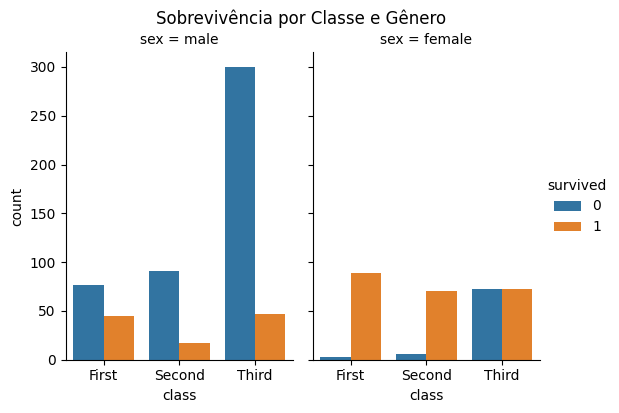

In [12]:
sns.catplot(data=titanic, x='class', hue='survived', col='sex', kind='count', height=4, aspect=0.7)
plt.suptitle('Sobrevivência por Classe e Gênero', y=1.02)
plt.show()
